In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/drug200.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
x_drugs = df.iloc[:, 0:5].values

In [6]:
y_drugs = df.iloc[:, 5].values

In [7]:
label_encoder_sex = LabelEncoder()
label_encoder_bp = LabelEncoder()
label_encoder_cholesterol = LabelEncoder()

In [8]:
x_drugs[:, 1] = label_encoder_sex.fit_transform(x_drugs[:, 1])
x_drugs[:, 2] = label_encoder_bp.fit_transform(x_drugs[:, 2])
x_drugs[:, 3] = label_encoder_cholesterol.fit_transform(x_drugs[:, 3])

In [9]:
x_drugs

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607000000000001],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767000000000001],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.941999999999997],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.515999999999998],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972000000000001],
       [23, 1, 1, 0, 7.297999999999999],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.916999999999998],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.95

In [10]:
onehotencoder_drugs = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 2, 3])], remainder='passthrough')

In [11]:
x_drugs = onehotencoder_drugs.fit_transform(x_drugs)

In [12]:
x_drugs.shape

(200, 9)

In [13]:
scaler_drugs = StandardScaler()
x_drugs = scaler_drugs.fit_transform(x_drugs)

In [14]:
x_drugs

array([[ 1.040833  , -1.040833  ,  1.26388393, ..., -0.97043679,
        -1.29159102,  1.28652212],
       [-0.96076892,  0.96076892, -0.79121189, ..., -0.97043679,
         0.16269866, -0.4151454 ],
       [-0.96076892,  0.96076892, -0.79121189, ..., -0.97043679,
         0.16269866, -0.82855818],
       ...,
       [-0.96076892,  0.96076892, -0.79121189, ..., -0.97043679,
         0.46567567, -0.85908883],
       [-0.96076892,  0.96076892, -0.79121189, ...,  1.03046381,
        -1.29159102, -0.28650033],
       [ 1.040833  , -1.040833  , -0.79121189, ...,  1.03046381,
        -0.26146916, -0.6571702 ]])

In [15]:
x_drugs_treino, x_drugs_teste, y_drugs_treino, y_drugs_teste = train_test_split(x_drugs, y_drugs, test_size = 0.30, random_state=0)

In [16]:
x_drugs_treino.shape, y_drugs_treino.shape

((140, 9), (140,))

In [17]:
x_drugs_teste.shape, y_drugs_teste.shape

((60, 9), (60,))

In [18]:
naive_drugs = GaussianNB()
naive_drugs.fit(x_drugs_treino, y_drugs_treino)

GaussianNB()

In [19]:
previsoes = naive_drugs.predict(x_drugs_teste)
previsoes

array(['drugC', 'drugX', 'drugC', 'DrugY', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugC', 'drugX', 'drugA', 'drugA', 'drugA', 'drugX',
       'drugB', 'drugC', 'DrugY', 'drugX', 'drugX', 'drugA', 'drugA',
       'drugX', 'drugX', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'drugB', 'drugX', 'drugC', 'drugA', 'drugX', 'drugA', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA',
       'drugB', 'drugX', 'drugB', 'DrugY', 'drugA', 'drugC', 'DrugY',
       'drugX', 'drugX', 'drugX', 'drugB'], dtype='<U5')

In [20]:
y_drugs

array(['DrugY', 'drugC', 'drugC', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'drugX', 'drugA', 'drugC', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'drugX', 'drugB', 'drugX', 'DrugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA', 'DrugY',
       'drugX', 'drugB', 'DrugY', 'drugA', 'drugX', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'Dru

0.6833333333333333

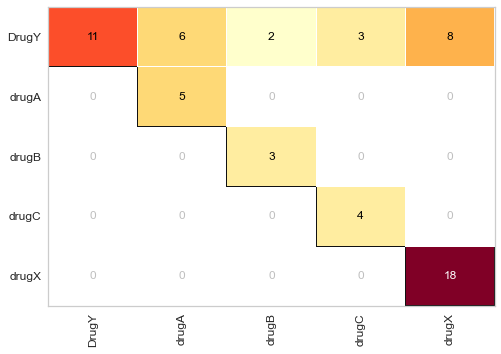

In [21]:
cm = ConfusionMatrix(naive_drugs)
cm.fit(x_drugs_treino, y_drugs_treino)
cm.score(x_drugs_teste, y_drugs_teste)

Algoritmo Decision Tree

In [22]:
arvore_drugs = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_drugs.fit(x_drugs_treino, y_drugs_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
previsoes2 = arvore_drugs.predict(x_drugs_teste)
previsoes2

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

1.0

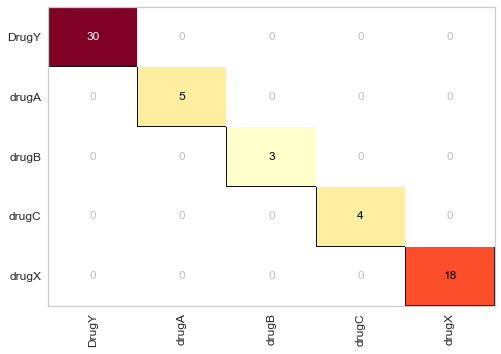

In [24]:
cm = ConfusionMatrix(arvore_drugs)
cm.fit(x_drugs_treino, y_drugs_treino)
cm.score(x_drugs_teste, y_drugs_teste)

Algoritmo KNN

In [25]:
knn_drugs = KNeighborsClassifier(n_neighbors=20)
knn_drugs.fit(x_drugs_treino, y_drugs_treino)

KNeighborsClassifier(n_neighbors=20)

In [26]:
previsoes3 = knn_drugs.predict(x_drugs_teste)
previsoes3

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

0.8333333333333334

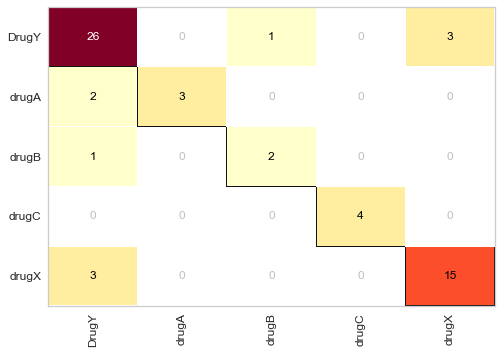

In [27]:
cm = ConfusionMatrix(knn_drugs)
cm.fit(x_drugs_treino, y_drugs_treino)
cm.score(x_drugs_teste, y_drugs_teste)

In [28]:
random_forest_drugs = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_drugs.fit(x_drugs_treino, y_drugs_treino)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [29]:
previsoes4 = random_forest_drugs.predict(x_drugs_teste)
previsoes4

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

1.0

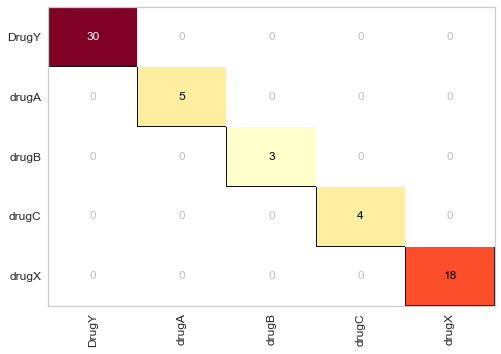

In [30]:
cm = ConfusionMatrix(random_forest_drugs)
cm.fit(x_drugs_treino, y_drugs_treino)
cm.score(x_drugs_teste, y_drugs_teste)